In [7]:
import geopandas
import matplotlib.pyplot as plt
import pandas as pd

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
df = pd.read_csv('per-capita-electricity-generation.csv')

cp = df[df['Code'].isnull()]
result2 = cp[cp['Entity'].isin(['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America'])]
result2 = result2[result2['Year'] <= 2020]
cp = cp[cp['Year'] == 2019]
result1 = cp[cp['Entity'].isin(['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America'])]

world = world[(world.pop_est>0) & (world.name!="Antarctica")]

world.columns = ['pop_est', 'continent', 'name', 'Code', 'gdp_md_est', 'geometry']

df = df[df['Year'] == 2019]

merge = pd.merge(world, df, on='Code')
result = merge.drop(['continent', 'name', 'gdp_md_est', 'pop_est', 'Year', 'Entity'], axis=1)

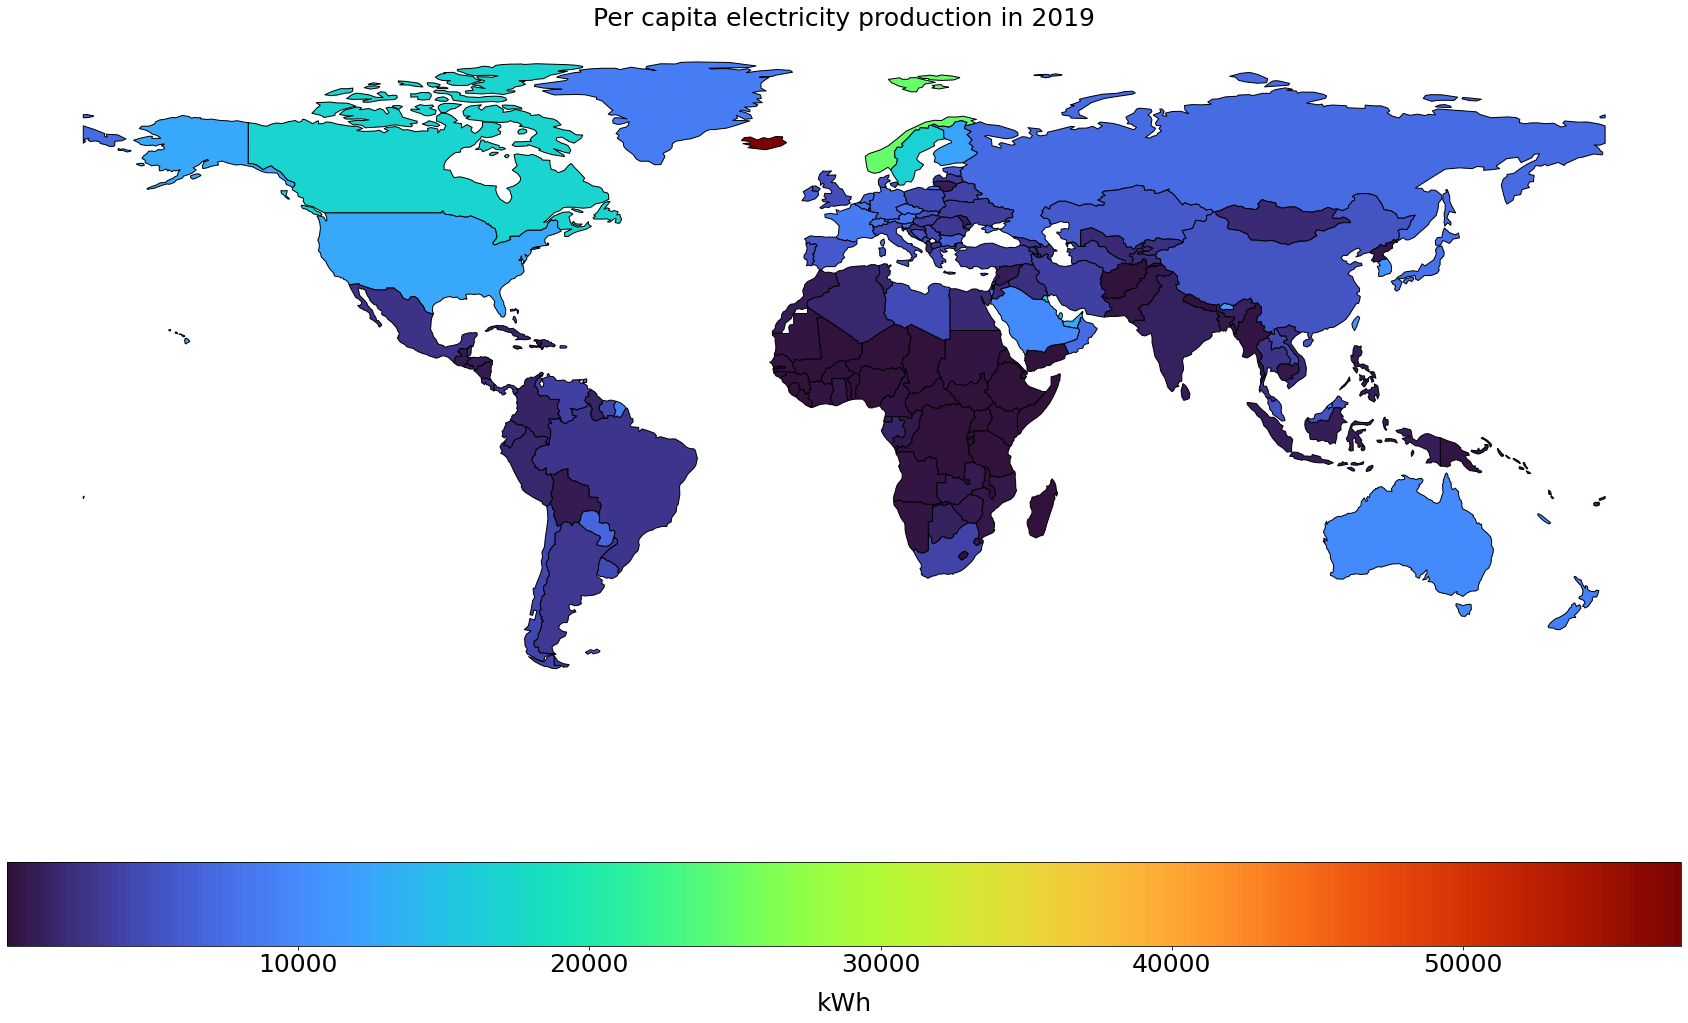

In [3]:
fig, axis = plt.subplots(1, figsize=(30,20))
result.plot(ax=axis, column='Per capita electricity (kWh)', legend=True, 
            legend_kwds={'orientation': "horizontal"}, 
            cmap='turbo', edgecolor='black')
plt.title("Per capita electricity production in 2019", fontsize=25)
axis.set_axis_off();

fig = axis.figure
cb = fig.axes[1]
cb.tick_params(labelsize=25)
cb.set_xlabel("kWh", fontsize=25, labelpad=15)

plt.savefig('World\'s per capita electricity production in 2019.jpg', dpi=300, bbox_inches='tight')
plt.show()

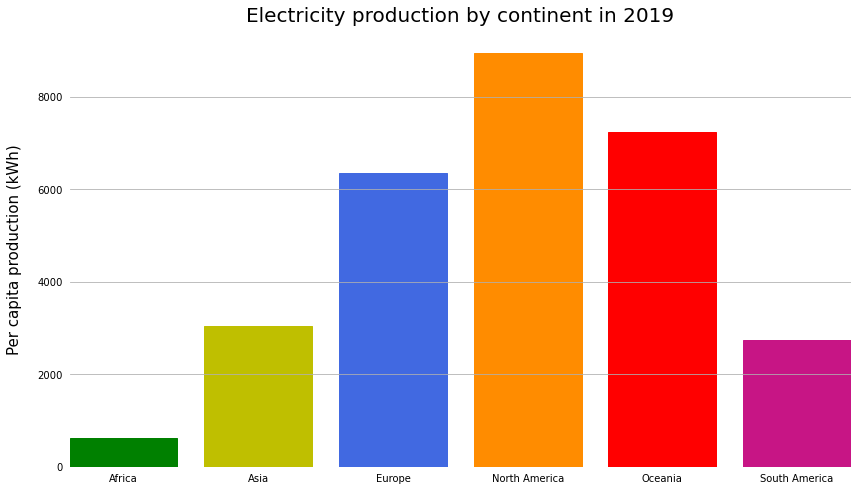

In [5]:
plt.figure(figsize=(14,8))
plt.title("Electricity production by continent in 2019", fontsize=20, pad=10)

graph = plt.bar(result1['Entity'], result1['Per capita electricity (kWh)'])

graph[0].set_color('green')
graph[1].set_color('y')
graph[2].set_color('royalblue')
graph[3].set_color('darkorange')
graph[4].set_color('red')
graph[5].set_color('mediumvioletred')

plt.margins(x=0)
plt.box(on=None)

plt.ylabel("Per capita production (kWh)", fontsize=15, labelpad=15)
plt.tick_params(bottom=False, left=False)
plt.gca().yaxis.grid()

plt.savefig('Per capita electricity production by continent in 2019.jpg', dpi=300, bbox_inches = 'tight')
plt.show()

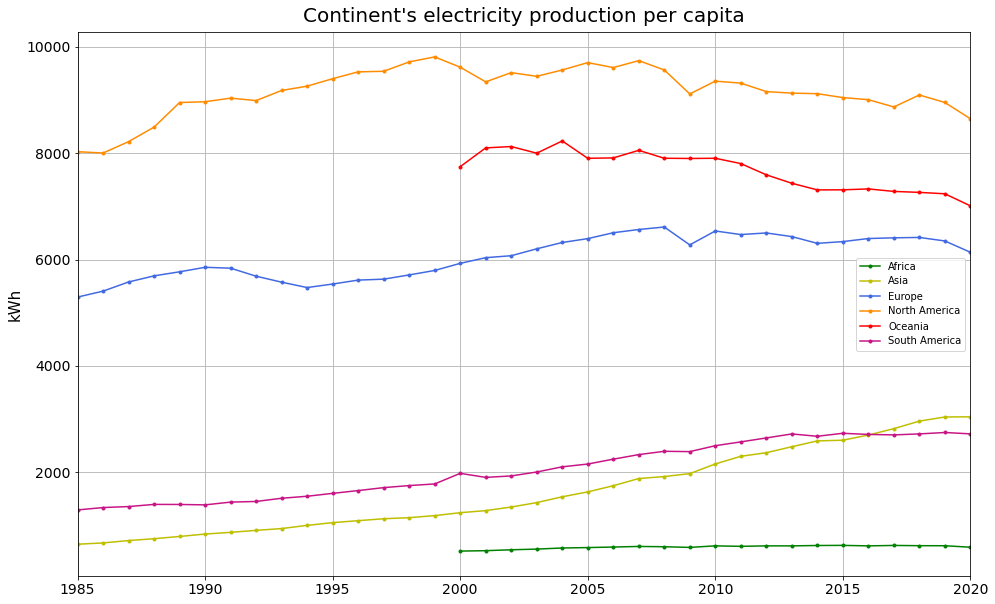

In [6]:
plt.figure(figsize=(16,10))
plt.title("Continent's electricity production per capita", fontsize=20, pad=10)

Africa = result2[result2['Entity'] == 'Africa']
Asia = result2[result2['Entity'] == 'Asia']
Europe = result2[result2['Entity'] == 'Europe']
NorthAmerica = result2[result2['Entity'] == 'North America']
Oceania = result2[result2['Entity'] == 'Oceania']
SouthAmerica = result2[result2['Entity'] == 'South America']

plt.plot(Africa['Year'], Africa['Per capita electricity (kWh)'], marker="o", linewidth=1.5, markersize=3, color='green')
plt.plot(Asia['Year'], Asia['Per capita electricity (kWh)'], marker="o", linewidth=1.5, markersize=3, color='y')
plt.plot(Europe['Year'], Europe['Per capita electricity (kWh)'], marker="o", linewidth=1.5, markersize=3, color='royalblue')
plt.plot(NorthAmerica['Year'], NorthAmerica['Per capita electricity (kWh)'], marker="o", linewidth=1.5, markersize=3, color='darkorange')
plt.plot(Oceania['Year'], Oceania['Per capita electricity (kWh)'], marker="o", linewidth=1.5, markersize=3, color='red')
plt.plot(SouthAmerica['Year'], SouthAmerica['Per capita electricity (kWh)'], marker="o", linewidth=1.5, markersize=3, color='mediumvioletred')

plt.legend(['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America'])

plt.grid(True)
plt.margins(x=0)

plt.ylabel('kWh', fontsize=15)

plt.xticks(fontsize=14) 
plt.yticks(fontsize=14)

plt.savefig('Continent\'s electricity production per capita.jpg', dpi=300, bbox_inches='tight')

plt.show()